In [46]:
import os

import cv2

import numpy as np

import matplotlib.pyplot as plt

# Import Warnings 

import warnings

warnings.filterwarnings('ignore')

import pandas as pd


from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

# Import tensorflow as the backend for Keras

from keras import backend as K

K.set_image_dim_ordering('tf')

from keras.utils import np_utils

from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.optimizers import SGD,RMSprop,adam

from keras.callbacks import TensorBoard

# Import required libraries for cnfusion matrix

from sklearn.metrics import classification_report,confusion_matrix

import itertools

from skimage.util import random_noise

from skimage.color import rgb2gray

from skimage.transform import rotate

from skimage import exposure

from scipy import ndimage

In [47]:
PATH = os.getcwd()

In [48]:
PATH

'/home/logivations/arsen'

In [49]:
PATH = os.getcwd()

# Define data path

data_path = PATH + '/input/data/'

data_dir_list = os.listdir(data_path)

data_dir_list

['cats', 'horses', 'flowers', 'cars', 'bike', 'human', 'dogs']

In [50]:
img_rows=128

img_cols=128

num_channel=1

num_epoch=5

# Define the number of classes

num_classes = 7

img_data_list=[]

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

Loaded the images of dataset-cats

Loaded the images of dataset-horses

Loaded the images of dataset-flowers

Loaded the images of dataset-cars

Loaded the images of dataset-bike

Loaded the images of dataset-human

Loaded the images of dataset-dogs

(3606, 128, 128)


In [51]:
if num_channel==1:
    if K.image_dim_ordering()=='th':
        img_data= np.expand_dims(img_data, axis=1) 
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=4) 
        print (img_data.shape)
        
else:
    if K.image_dim_ordering()=='th':
        img_data=np.rollaxis(img_data,3,1)
        print (img_data.shape)

(3606, 128, 128, 1)


In [52]:
[1212, 2424, 3684, 6204, 8394, 9606, 10818]

[1212, 2424, 3684, 6204, 8394, 9606, 10818]

In [53]:
num_classes = 7
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:404]=0
labels[404:808]=1
labels[808:1228]=2
labels[1228:2068]=3
labels[2068:2798]=4
labels[2798:3202]=5
labels[3202:3606]=6
names = ['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

In [54]:
Y = np_utils.to_categorical(labels, num_classes)

In [55]:
x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [56]:
type(X_train)

numpy.ndarray

In [57]:
print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

X_train shape = (2884, 128, 128, 1)
X_test shape = (722, 128, 128, 1)


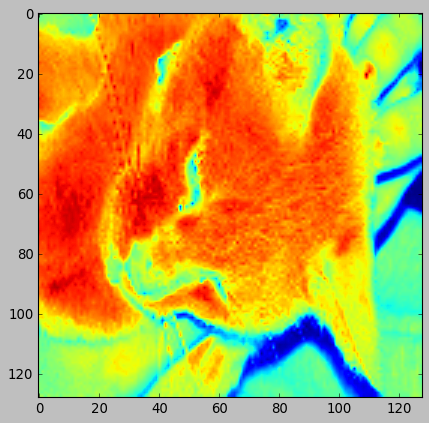

In [58]:
image = X_train[1201,:].reshape((128,128))
plt.imshow(image)
plt.show()

In [59]:
#Initialising the input shape
input_shape=img_data[0].shape
# Design the CNN Sequential model
cnn_model = Sequential([
    Convolution2D(32,3,3,border_mode ='same',activation='relu',input_shape = input_shape),
    Convolution2D(32,3,3,activation='relu'),
    MaxPooling2D(pool_size=(2,2)) ,
    Dropout(0.5),
    Flatten(), 
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(num_classes,activation = 'softmax')
])

In [60]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=["accuracy"])

In [61]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 127008)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16257152  
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [62]:
hist = cnn_model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

Train on 2884 samples, validate on 722 samples
Epoch 1/5
2884/2884 [==============================] - 84s 29ms/step - loss: 1.8315 - acc: 0.2968 - val_loss: 1.6163 - val_acc: 0.3920
Epoch 2/5
2884/2884 [==============================] - 82s 28ms/step - loss: 1.5151 - acc: 0.4546 - val_loss: 1.5785 - val_acc: 0.4335
Epoch 3/5
2884/2884 [==============================] - 87s 30ms/step - loss: 1.1760 - acc: 0.5839 - val_loss: 1.2858 - val_acc: 0.5069
Epoch 4/5
2884/2884 [==============================] - 85s 30ms/step - loss: 0.8246 - acc: 0.7292 - val_loss: 1.0679 - val_acc: 0.5983
Epoch 5/5
2884/2884 [==============================] - 81s 28ms/step - loss: 0.6098 - acc: 0.8079 - val_loss: 1.1407 - val_acc: 0.5956


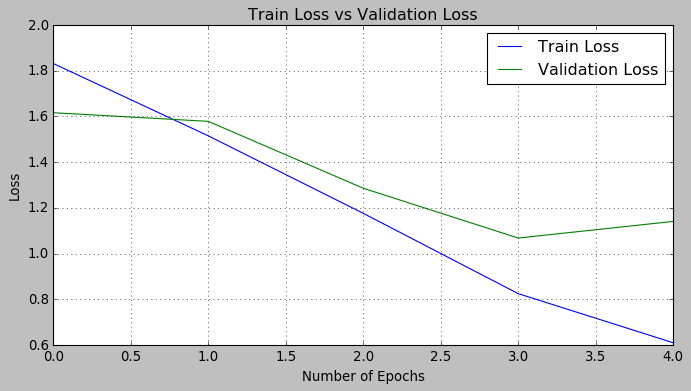

In [63]:
plt.figure(1,figsize=(10,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Train Loss','Validation Loss'])
plt.style.use(['classic'])

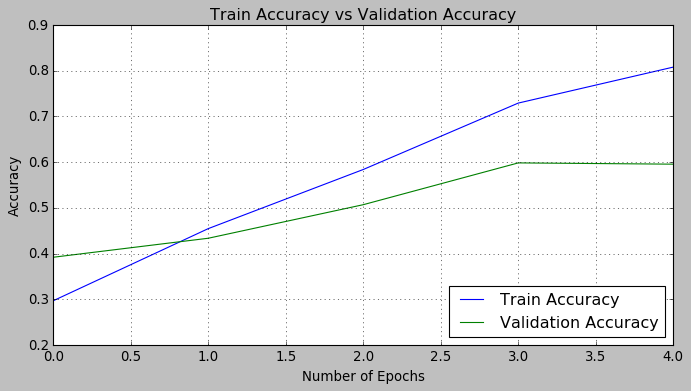

In [64]:
plt.figure(2,figsize=(10,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.grid(True)
plt.legend(['Train Accuracy','Validation Accuracy'],loc=4)
plt.style.use(['classic'])

In [65]:
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 1.1407365921131463
Test Accuracy: 0.5955678675313405


In [66]:
test_image = X_test[0:1]
print (test_image.shape)
print(cnn_model.predict(test_image))
print(cnn_model.predict_classes(test_image))
print(y_test[0:1])

(1, 128, 128, 1)
[[2.48e-02 8.88e-01 4.65e-02 1.35e-03 1.92e-03 8.65e-04 3.68e-02]]
[1]
[[0. 1. 0. 0. 0. 0. 0.]]


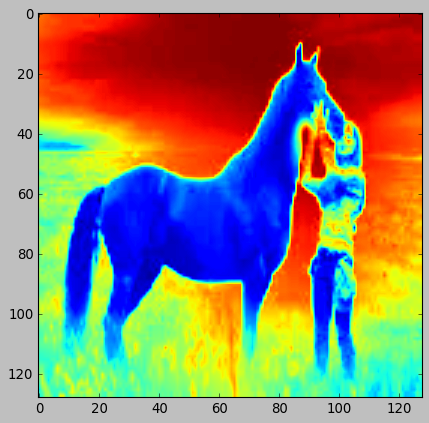

In [67]:
image = test_image.reshape((128,128))
plt.imshow(image)
plt.show()

In [68]:
test_img = cv2.imread(PATH + '/input/data/human/rider-104.jpg')
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
test_img = cv2.resize(test_img,(128,128))
test_img = np.array(test_img)
test_img = test_img.astype('float32')
test_img /= 255
print(test_img.shape)

(128, 128)


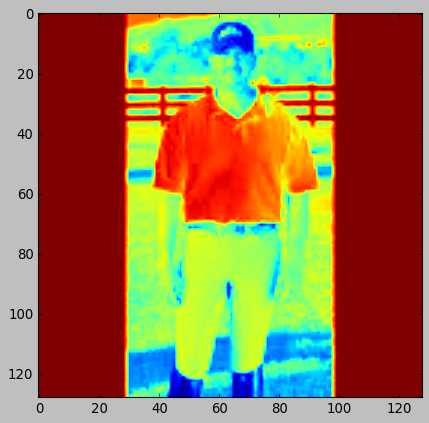

In [69]:
image = test_img.reshape((128,128))
plt.imshow(image)
plt.show()

In [70]:
if num_channel==1:
    if K.image_dim_ordering()=='th':
        test_img= np.expand_dims(test_img, axis=0)
        test_img= np.expand_dims(test_img, axis=0)
        print (test_img.shape)
    else:
        test_img= np.expand_dims(test_img, axis=3) 
        test_img= np.expand_dims(test_img, axis=0)
        print (test_img.shape)
        
else:
    if K.image_dim_ordering()=='th':
        test_img=np.rollaxis(test_img,2,0)
        test_img= np.expand_dims(test_img, axis=0)
        print (test_img.shape)
    else:
        test_img= np.expand_dims(test_img, axis=0)
        print (test_img.shape)
        
# Predicting the test image
print((cnn_model.predict(test_img)))
print(cnn_model.predict_classes(test_img))

(1, 128, 128, 1)
[[1.35e-02 7.18e-03 1.36e-02 8.73e-04 1.27e-03 9.60e-01 3.19e-03]]
[5]


In [71]:
def get_featuremaps(cnn_model, layer_idx, X_batch):
    get_activations = K.function([cnn_model.layers[0].input, K.learning_phase()],[cnn_model.layers[layer_idx].output,])
    activations = get_activations([X_batch,0])
    return activations
layer_num=3
filter_num=0
activations = get_featuremaps(cnn_model, int(layer_num),test_img)
print (np.shape(activations))

(1, 1, 63, 63, 32)


In [72]:
feature_maps = activations[0][0]      
print (np.shape(feature_maps))

(63, 63, 32)


In [73]:
if K.image_dim_ordering()=='th':
    feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)

(63, 63, 32)


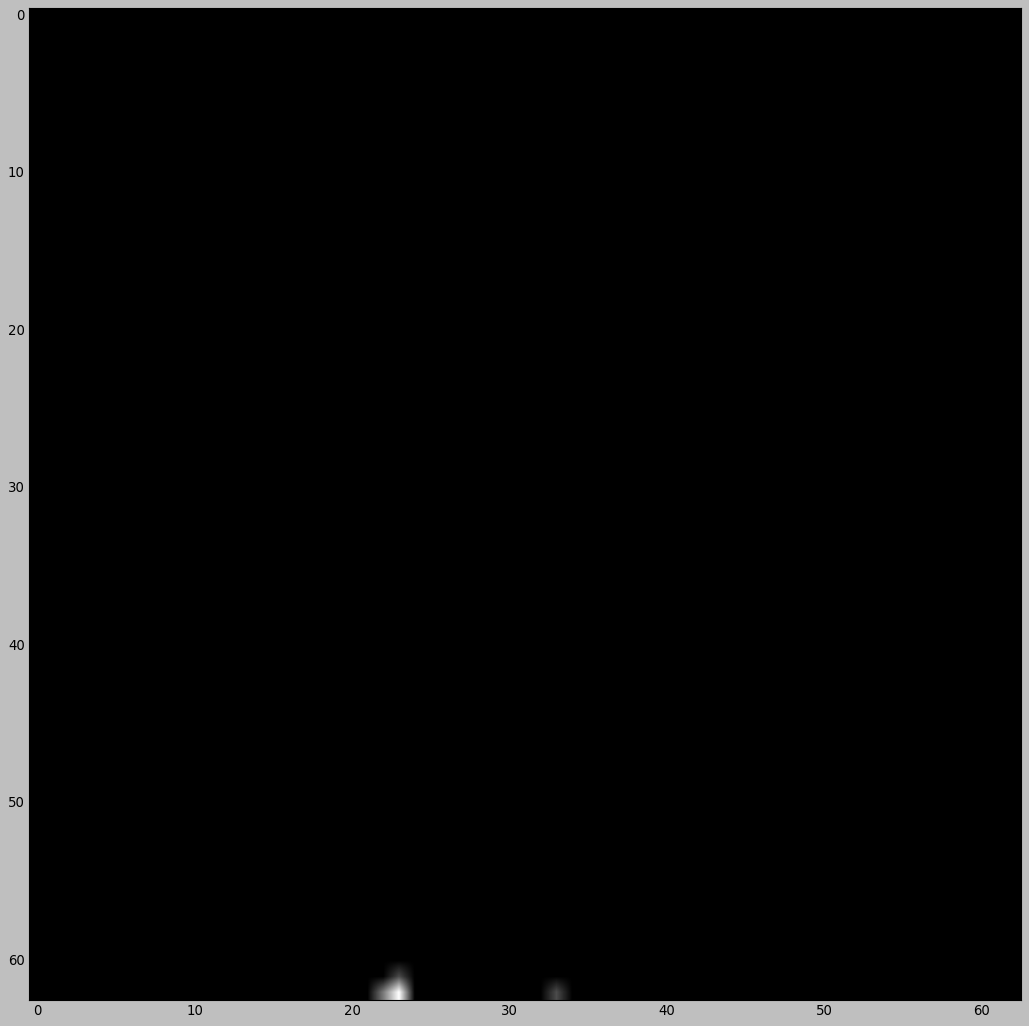

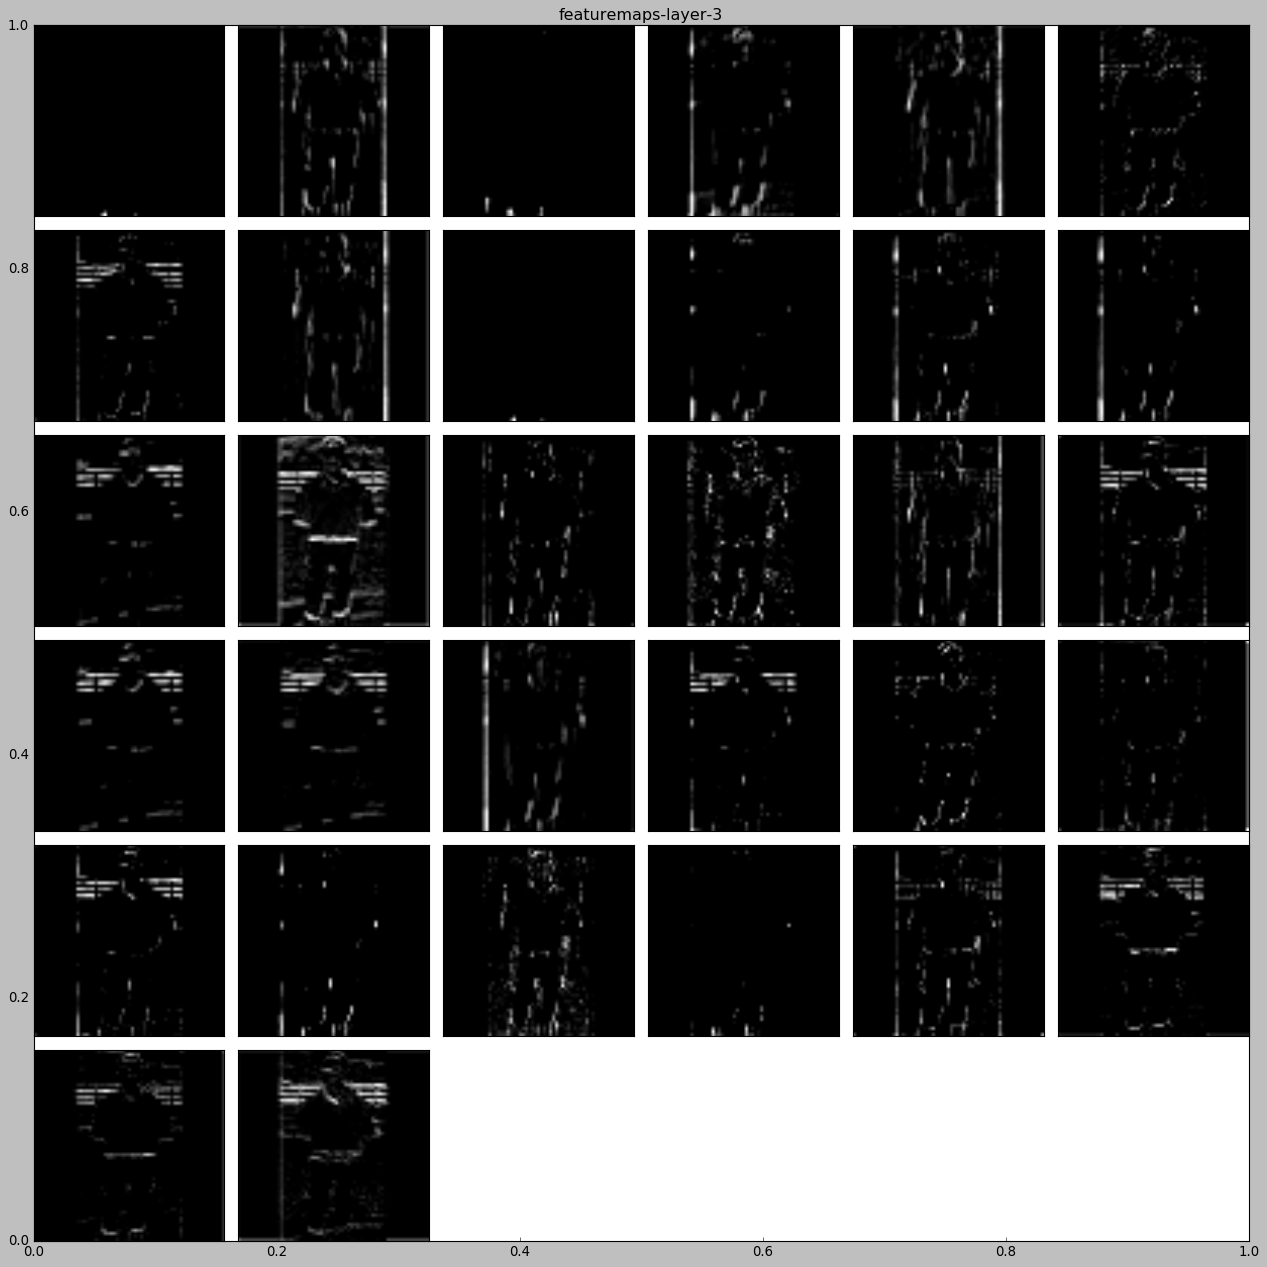

In [74]:
fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')
num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
    ax = fig.add_subplot(subplot_num, subplot_num, i+1)
    #ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
    ax.imshow(feature_maps[:,:,i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()

In [75]:
# Print the confusion matrix
Y_pred = cnn_model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred,axis=1)
print(y_pred)
target_names=['Class 0 (flowers)', 'Class 1 (cars)', 'Class 2 (cats)', 'Class 3 (horses)',
              'Class 4 (human)', 'Class 5 (bike)', 'Class 6 (dogs)']
print(classification_report(np.argmax(y_test,axis=1),y_pred,target_names=target_names))

[[2.48e-02 8.88e-01 4.65e-02 ... 1.92e-03 8.65e-04 3.68e-02]
 [1.27e-01 2.49e-01 4.49e-01 ... 1.09e-02 2.02e-02 1.41e-01]
 [1.22e-01 9.19e-04 1.14e-03 ... 4.35e-01 1.33e-04 1.02e-02]
 ...
 [7.87e-02 1.63e-01 6.18e-01 ... 1.93e-03 7.20e-03 1.30e-01]
 [1.79e-03 4.47e-06 3.32e-07 ... 1.29e-02 3.61e-05 7.44e-04]
 [1.02e-03 3.11e-05 5.69e-04 ... 9.91e-05 9.77e-01 6.42e-04]]
[1 2 4 0 1 4 3 3 3 0 0 5 2 3 2 2 5 3 2 0 3 2 3 3 0 1 3 0 4 1 0 3 0 0 3 3 4
 5 3 4 2 2 3 3 0 2 2 2 2 2 0 3 3 0 2 0 3 4 4 6 4 2 2 3 0 4 5 0 3 1 2 2 4 6
 3 6 3 5 6 0 0 0 6 3 1 3 0 4 3 2 3 0 2 3 0 3 3 4 0 0 2 3 3 4 5 4 2 6 3 0 4
 3 3 2 0 2 0 1 4 3 0 6 5 2 0 6 3 1 4 4 3 4 6 1 0 0 3 2 2 4 3 0 3 2 4 0 0 2
 4 0 2 1 0 6 2 4 2 3 3 3 4 6 0 1 3 3 2 5 3 3 0 1 3 2 5 0 3 3 5 2 3 1 4 0 3
 1 3 4 0 4 1 3 3 3 3 0 4 0 3 6 6 0 0 3 2 2 0 0 3 0 0 3 3 2 4 0 5 2 3 2 3 2
 2 3 0 2 0 6 3 3 3 5 6 5 0 1 3 3 0 0 4 4 0 3 0 1 3 3 4 1 2 4 1 1 3 6 2 1 2
 4 3 4 1 0 3 3 6 2 3 1 1 0 6 4 2 0 2 0 2 4 3 0 3 4 0 4 3 3 3 1 3 3 3 3 0 3
 4 0 4 3 3 6 3 0 6 4 2 5 0 3

In [76]:
print('Confusion Matrix \n')
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

Confusion Matrix 

[[ 52   3  10  12   5   2   9]
 [ 18  45  14   4   0   0   6]
 [  9   0  69   2   0   0   1]
 [ 19   0   1 128  16   3   5]
 [ 16   3   1  38  75   0   2]
 [ 14   6   4   2   3  40   7]
 [ 25   8  12  12   0   0  21]]


In [77]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float32') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix with Normalization")
    else:
        print('Confusion matrix without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Confusion matrix without normalization
[[ 52   3  10  12   5   2   9]
 [ 18  45  14   4   0   0   6]
 [  9   0  69   2   0   0   1]
 [ 19   0   1 128  16   3   5]
 [ 16   3   1  38  75   0   2]
 [ 14   6   4   2   3  40   7]
 [ 25   8  12  12   0   0  21]]


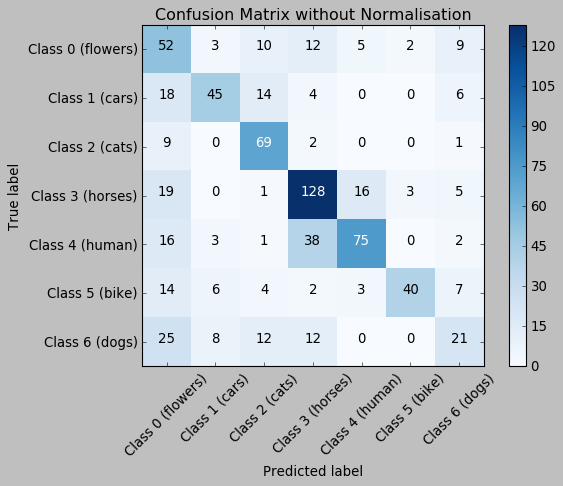

In [78]:
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion Matrix without Normalisation')
plt.show()

Confusion matrix with Normalization
[[0.56 0.03 0.11 0.13 0.05 0.02 0.1 ]
 [0.21 0.52 0.16 0.05 0.   0.   0.07]
 [0.11 0.   0.85 0.02 0.   0.   0.01]
 [0.11 0.   0.01 0.74 0.09 0.02 0.03]
 [0.12 0.02 0.01 0.28 0.56 0.   0.01]
 [0.18 0.08 0.05 0.03 0.04 0.53 0.09]
 [0.32 0.1  0.15 0.15 0.   0.   0.27]]


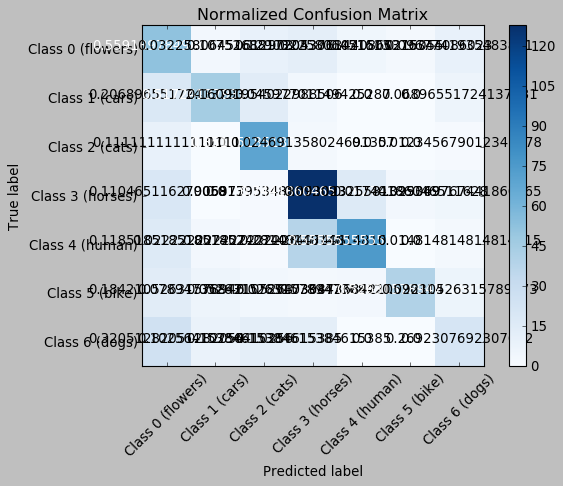

<Figure size 640x480 with 0 Axes>

In [79]:
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                      title='Normalized Confusion Matrix')
plt.figure()
plt.show()